# RETORNO ACUMULADO
Una tremenda forma para comparar el desempeño de dos activos es poner sobre la mesa el retorno acumulado de ambos. Para poner en práctica el cálculo del retorno acumulado se utilizarán dos empresas completamente distintas: Alphabet y Texas RoadHouse.

In [20]:
# librerias indispensables para trabajar
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# definimos un rango de fecha
start = dt.datetime(2017,3,20)
end = dt.datetime.now()

In [30]:
# obteniendo precio de cierre de ambos activos
stocks = ['TXRH', 'GOOGL']
close_price = pdr.get_data_yahoo(stocks, start, end)['Close']
close_price.head()

[*********************100%***********************]  2 of 2 completed


,GOOGL,TXRH
Date,,
2017-03-20 00:00:00-04:00,43.395500,43.919998
2017-03-21 00:00:00-04:00,42.507000,43.259998
2017-03-22 00:00:00-04:00,42.490002,43.230000
2017-03-23 00:00:00-04:00,41.982498,43.529999
2017-03-24 00:00:00-04:00,41.757000,43.529999


In [31]:
# nos interesa el retorno diario, para luego calcular el retorno acumulado
returns = close_price.pct_change()
returns.tail()

,GOOGL,TXRH
Date,,
2023-03-14 00:00:00-04:00,0.031391,0.018104
2023-03-15 00:00:00-04:00,0.022773,0.000860
2023-03-16 00:00:00-04:00,0.043804,0.031808
2023-03-17 00:00:00-04:00,0.012959,-0.024995
2023-03-20 00:00:00-04:00,-0.012498,0.019370


In [32]:
# calculando retorno acumulado
acumulative_returns = (1+returns).cumprod()-1
acumulative_returns.tail()

,GOOGL,TXRH
Date,,
2023-03-14 00:00:00-04:00,1.165432,1.381603
2023-03-15 00:00:00-04:00,1.214746,1.383652
2023-03-16 00:00:00-04:00,1.311760,1.459472
2023-03-17 00:00:00-04:00,1.341718,1.397996
2023-03-20 00:00:00-04:00,1.312452,1.444445


En estos 4 años, un restaurante especializado en carne asada, con un market cap al 20/3/23 de $7,185 millones, generó un rendimiento superior que Alphabet, un gigante técnológico valorado por sobre el trillón de USD.

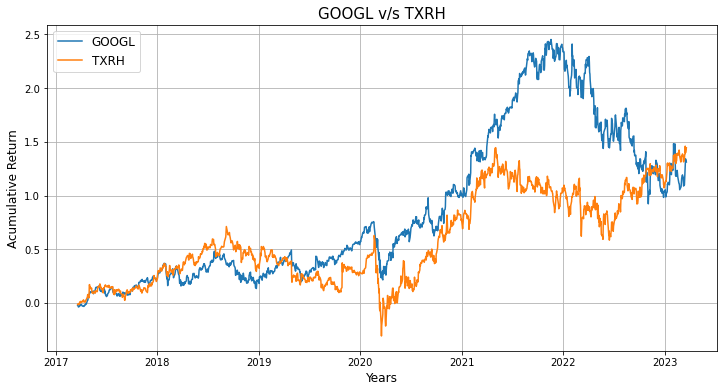

In [33]:
# a graficar la data
googl = acumulative_returns['GOOGL']
txrh = acumulative_returns['TXRH']

plt.figure(figsize=(12, 6)) # tamaño del gráfico
plt.plot(googl, label='GOOGL')
plt.plot(txrh, label='TXRH')

plt.title('GOOGL v/s TXRH', fontsize=15) # título
plt.ylabel('Acumulative Return', fontsize=12) # etiqueta eje y
plt.xlabel('Years', fontsize=12) # etiqueta eje x
plt.legend(loc=2, fontsize=12) 
plt.grid() # cuadrículas
plt.show()